In [67]:
import pandas as pd

In [68]:
df = pd.read_csv("Student_Mental_health.csv")

In [69]:
df

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,Female,21.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
97,13/07/2020 21:21:42,Male,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No
98,13/07/2020 21:22:56,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No


In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
df = df[df['Age'].notna()]
df['Age'] = df['Age'].astype(int)


In [73]:
df["Choose your gender"] = df["Choose your gender"].str.lower()


In [74]:
df["What is your course?"] = df["What is your course?"].str.lower()


In [75]:
df["Your current year of Study"] = df["Your current year of Study"].str.lower()              


In [76]:
df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,female,18,engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,male,21,islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,male,19,bit,year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,female,22,laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,male,23,mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


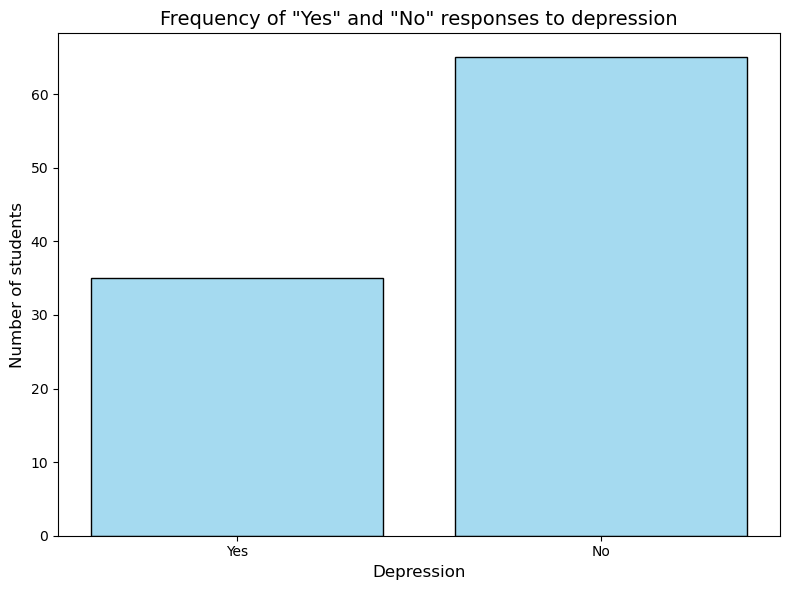

In [88]:
plt.figure(figsize=(8,6))
sns.histplot(df['Do you have Depression?'], kde=False, color='skyblue', discrete=True, shrink=0.8)
plt.title('Frequency of "Yes" and "No" responses to depression', fontsize=14)
plt.xlabel('Depression', fontsize=12)
plt.ylabel('Number of students', fontsize=12)
plt.tight_layout()
plt.show()

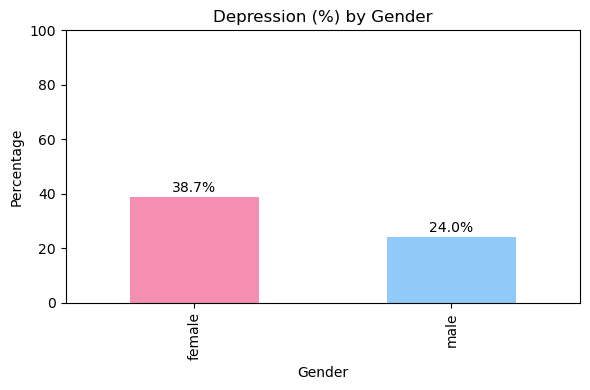

In [89]:
counts = df[df['Do you have Depression?'] == 'Yes']['Choose your gender'].value_counts()
totals = df['Choose your gender'].value_counts()
percentages = (counts / totals * 100).round(1)

percentages.plot(kind='bar', color=['#f48fb1', '#90caf9'], figsize=(6,4))
plt.title('Depression (%) by Gender')
plt.ylabel('Percentage')
plt.xlabel('Gender')
plt.ylim(0, 100)

for index, value in enumerate(percentages):
    plt.text(index, value + 2, f'{value}%', ha='center')

plt.tight_layout()
plt.show()

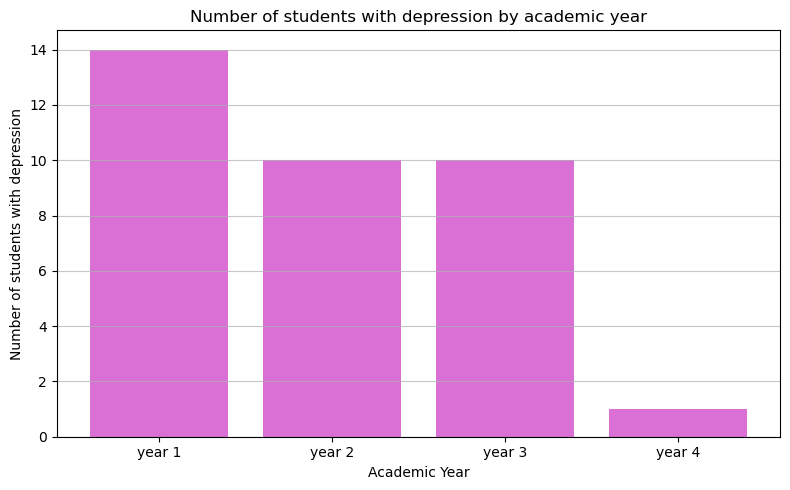

In [90]:
with_depression = df[df["Do you have Depression?"] == "Yes"]
counts = with_depression["Your current year of Study"].value_counts().sort_index()
plt.figure(figsize=(8,5))
plt.bar(counts.index, counts.values, color='orchid')
plt.xlabel("Academic Year")
plt.ylabel("Number of students with depression")
plt.title("Number of students with depression by academic year")
plt.xticks(counts.index)
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.tight_layout()
plt.show()

In [81]:
df['What is your CGPA?'] = df['What is your CGPA?'].str.strip()


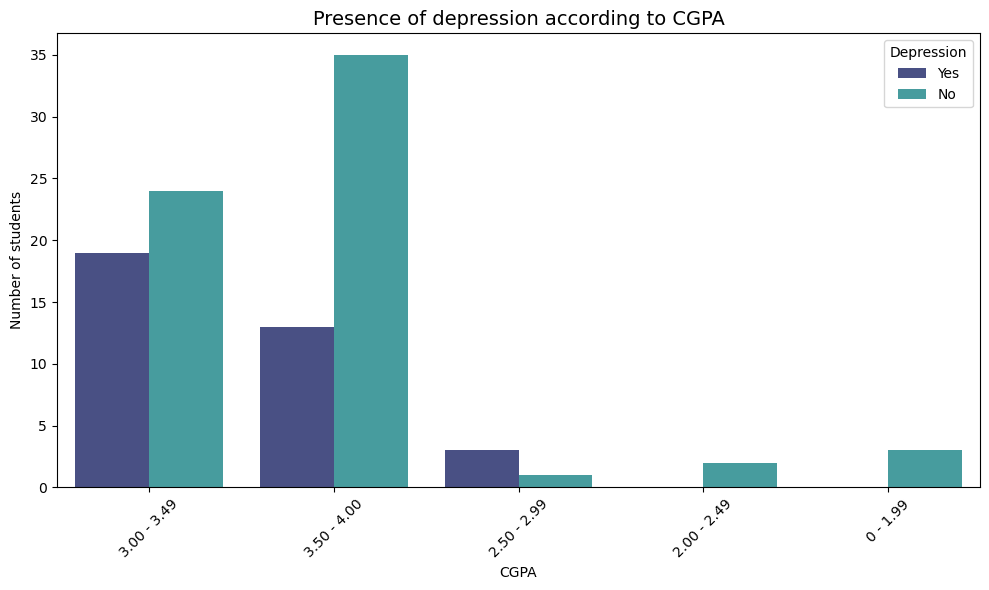

In [91]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='What is your CGPA?', hue='Do you have Depression?', palette='mako')
plt.title("Presence of depression according to CGPA", fontsize=14)
plt.xlabel("CGPA")
plt.ylabel("Number of students")
plt.xticks(rotation=45)
plt.legend(title="Depression", loc='upper right')
plt.tight_layout()
plt.show()

In [84]:
df_counts = pd.crosstab(df['What is your course?'], df['Do you have Depression?'])


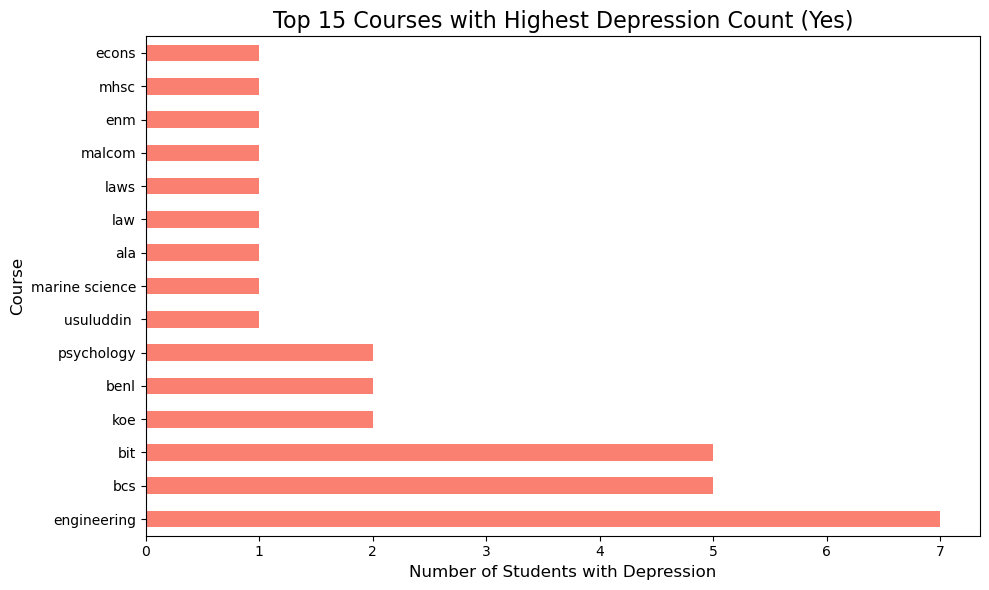

In [92]:
df_counts = pd.crosstab(df['What is your course?'], df['Do you have Depression?'])
depression_yes_counts = df_counts['Yes']
top_30_courses = depression_yes_counts.sort_values(ascending=False).head(15)
fig, ax = plt.subplots(figsize=(10, 6))
top_30_courses.plot(kind='barh', color='salmon', ax=ax)
plt.title('Top 15 Courses with Highest Depression Count (Yes)', fontsize=16)
plt.xlabel('Number of Students with Depression', fontsize=12)
plt.ylabel('Course', fontsize=12)
plt.tight_layout()
plt.show()

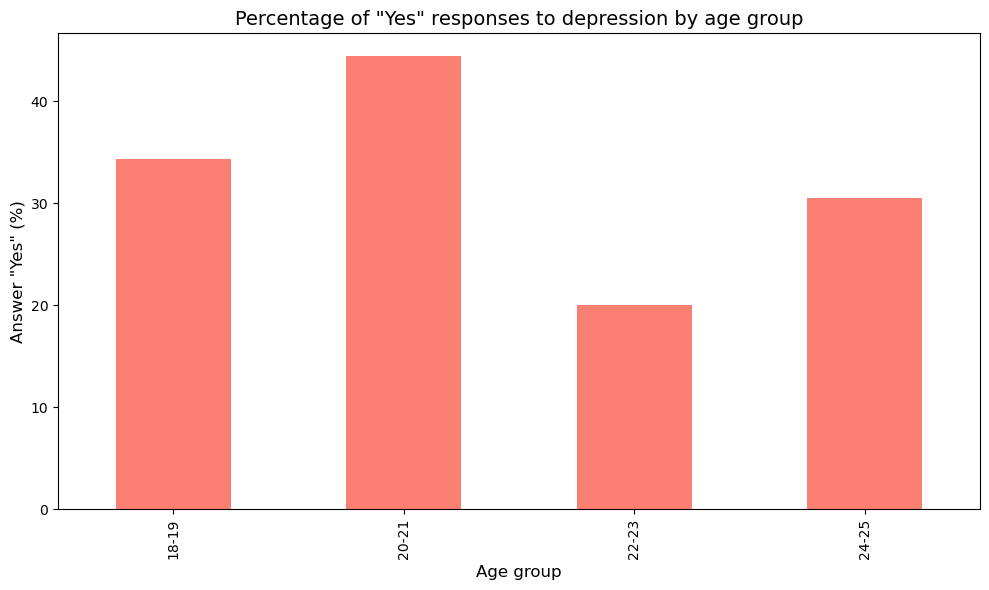

In [98]:
bins = [17, 19, 21, 23, 25]  
labels = ['18-19', '20-21', '22-23', '24-25']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
age_dep = pd.crosstab(df['Age Group'], df['Do you have Depression?'], normalize='index') * 100
age_dep = age_dep['Yes']
plt.figure(figsize=(10,6))
age_dep.plot(kind='bar', color='salmon')
plt.title('Percentage of "Yes" responses to depression by age group', fontsize=14)
plt.xlabel('Age group', fontsize=12)
plt.ylabel('Answer "Yes" (%)', fontsize=12)
plt.tight_layout()
plt.show()



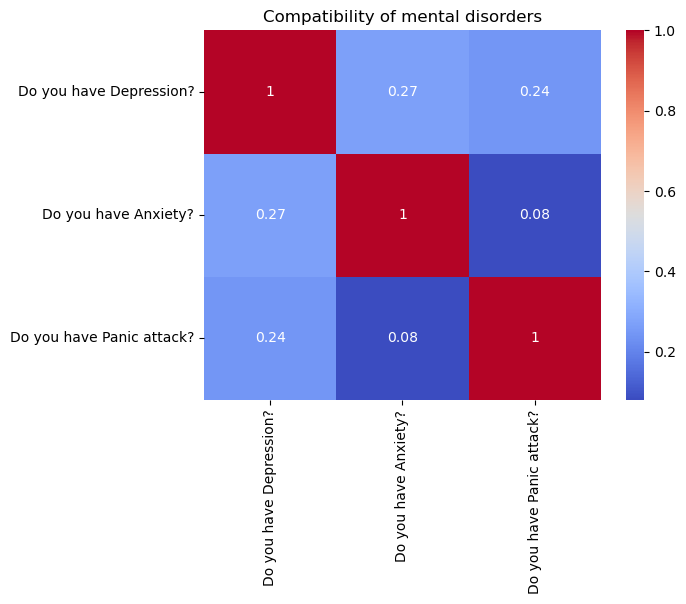

In [97]:
mental_health = df[['Do you have Depression?', 'Do you have Anxiety?', 'Do you have Panic attack?']] == 'Yes'
correlation = mental_health.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Compatibility of mental disorders")
plt.show()
